<a href="https://colab.research.google.com/github/Itaham05/CodeRoadies/blob/main/Customer_purchase_behavior_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
project_name = "Customer Purchase Behavior Prediction"
print(f"Project: {project_name}")

Project: Customer Purchase Behavior Prediction


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers


In [4]:
file_path = "/customerdataset.csv"
data = pd.read_csv(file_path)

In [6]:
df = pd.read_csv("/customerdataset.csv")
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchase,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,20,1,600000,12,0,30,0,5,1
1,23,1,400000,43,2,60,1,4,0
2,32,1,200000,12,3,63,1,3,0
3,33,1,100000,23,3,23,1,6,0
4,54,1,890000,34,1,12,0,2,1


In [7]:
print(data.shape)
print(data.head())
data.info()
data.describe()

(5, 9)
   Age  Gender  AnnualIncome  NumberOfPurchase  ProductCategory   \
0   20       1        600000                12                 0   
1   23       1        400000                43                 2   
2   32       1        200000                12                 3   
3   33       1        100000                23                 3   
4   54       1        890000                34                 1   

   TimeSpentOnWebsite   LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0                   30               0                 5               1  
1                   60               1                 4               0  
2                   63               1                 3               0  
3                   23               1                 6               0  
4                   12               0                 2               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column               Non-Null

,Age,Gender,AnnualIncome,NumberOfPurchase,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,5.000000,5.0,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,32.400000,1.0,438000.000000,24.800000,1.80000,37.600000,0.600000,4.000000,0.400000
std,13.315405,0.0,317364.144163,13.663821,1.30384,22.766203,0.547723,1.581139,0.547723
min,20.000000,1.0,100000.000000,12.000000,0.00000,12.000000,0.000000,2.000000,0.000000
25%,23.000000,1.0,200000.000000,12.000000,1.00000,23.000000,0.000000,3.000000,0.000000
50%,32.000000,1.0,400000.000000,23.000000,2.00000,30.000000,1.000000,4.000000,0.000000
75%,33.000000,1.0,600000.000000,34.000000,3.00000,60.000000,1.000000,5.000000,1.000000
max,54.000000,1.0,890000.000000,43.000000,3.00000,63.000000,1.000000,6.000000,1.000000


In [8]:
data.isnull().sum()

,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchase,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


In [9]:
df['PurchaseStatus'].value_counts()


,count
PurchaseStatus,
0,3
1,2


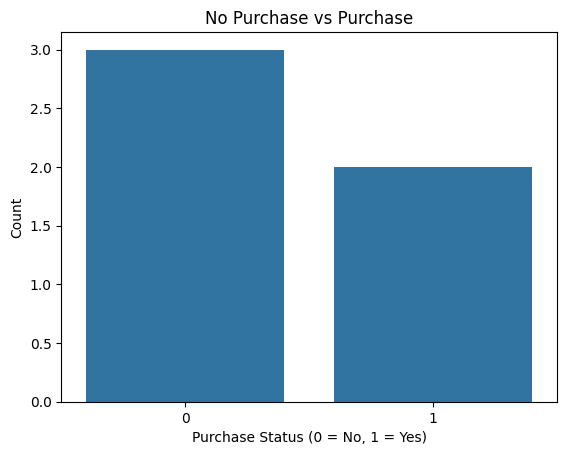

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize purchase behavior: No Purchase (0) vs. Purchase (1)
sns.countplot(x='PurchaseStatus', data=df)
plt.title('No Purchase vs Purchase')
plt.xlabel('Purchase Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

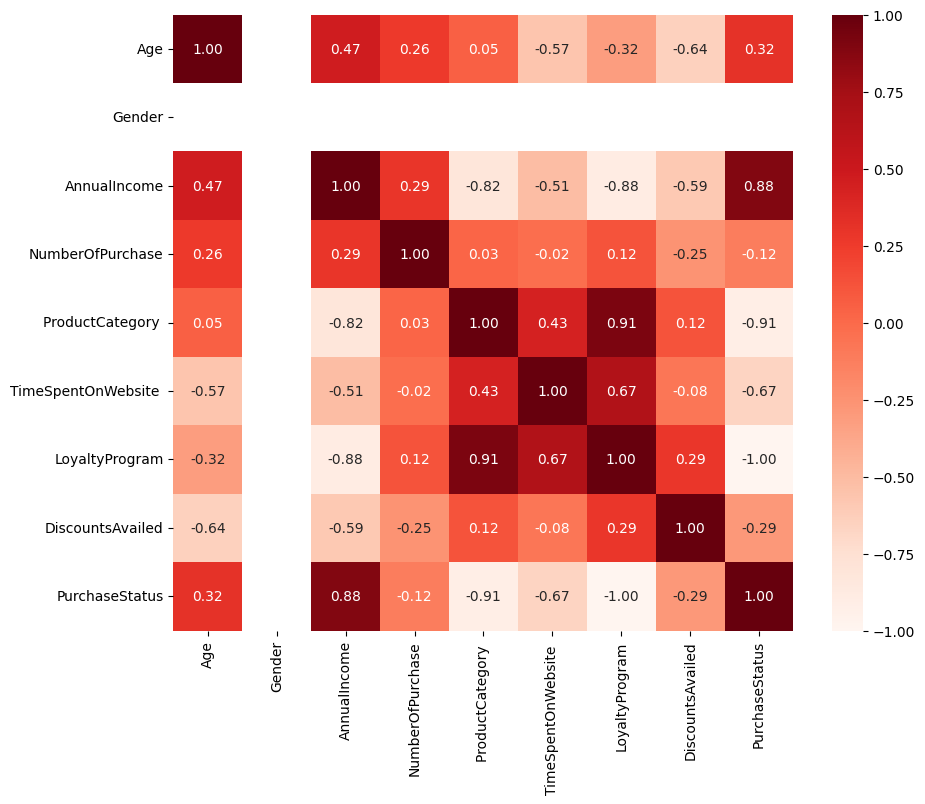

In [11]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="Reds", fmt=".2f")
plt.show


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define features (X) and target (y)
X = df.drop(columns=['PurchaseStatus'])
y = df['PurchaseStatus']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



# Define the vanilla model
model = Sequential()

#input layer
model.add(Dense(64, activation= 'relu', input_shape=(X_train.shape[1],)))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# compile the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Loss: {test_loss}")
print(f"Accuracy: {test_accuracy}")


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.6569 - val_accuracy: 1.0000 - val_loss: 0.6301
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 1.0000 - loss: 0.6216 - val_accuracy: 1.0000 - val_loss: 0.6249
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.5984 - val_accuracy: 1.0000 - val_loss: 0.6187
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 0.5804 - val_accuracy: 1.0000 - val_loss: 0.6119
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 0.5631 - val_accuracy: 1.0000 - val_loss: 0.6059
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 1.0000 - loss: 0.5485 - val_accuracy: 1.0000 - val_loss: 0.5985
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.5343 - val_accuracy: 1.0000 - val_loss: 0.5915
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 1.0000 - loss: 0.5197 - val_accuracy: 1.0000 - val_loss: 

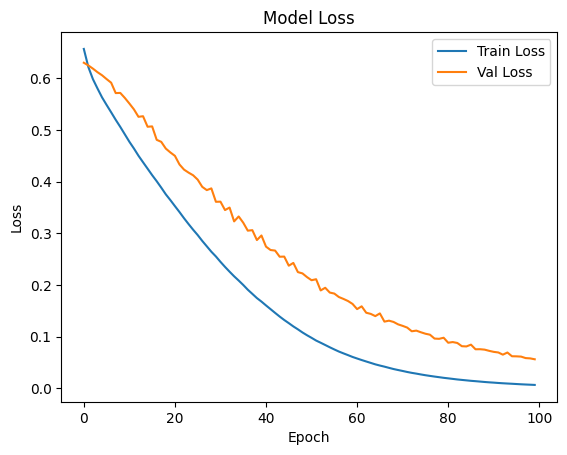

In [16]:
# Plot Training and validation loss values
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.show()

In [17]:
# L2 Regularized Model
model2 = Sequential()

# Input Layer
model2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden Layers
model2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model2.add(Dropout(0.2))

model2.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model2.add(Dropout(0.2))

# Output Layer
model2.add(Dense(1, activation='sigmoid'))

# Compile the model with RMSprop optimizer and binary cross-entropy loss
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model2
model2_history= model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping], verbose=2)

# Evaluate model2
model_loss, model_accuracy = model2.evaluate(X_test, y_test)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")





Epoch 1/100
1/1 - 1s - 1s/step - accuracy: 0.3333 - loss: 0.6825 - val_accuracy: 0.0000e+00 - val_loss: 0.8869
Epoch 2/100
1/1 - 0s - 51ms/step - accuracy: 1.0000 - loss: 0.6290 - val_accuracy: 0.0000e+00 - val_loss: 0.9019
Epoch 3/100
1/1 - 0s - 56ms/step - accuracy: 1.0000 - loss: 0.6167 - val_accuracy: 0.0000e+00 - val_loss: 0.9154
Epoch 4/100
1/1 - 0s - 49ms/step - accuracy: 1.0000 - loss: 0.6100 - val_accuracy: 0.0000e+00 - val_loss: 0.9171
Epoch 5/100
1/1 - 0s - 59ms/step - accuracy: 1.0000 - loss: 0.5831 - val_accuracy: 0.0000e+00 - val_loss: 0.9015
Epoch 6/100
1/1 - 0s - 71ms/step - accuracy: 1.0000 - loss: 0.5659 - val_accuracy: 0.0000e+00 - val_loss: 0.8956
Epoch 7/100
1/1 - 0s - 141ms/step - accuracy: 1.0000 - loss: 0.5682 - val_accuracy: 0.0000e+00 - val_loss: 0.8968
Epoch 8/100
1/1 - 0s - 79ms/step - accuracy: 1.0000 - loss: 0.6478 - val_accuracy: 0.0000e+00 - val_loss: 0.8879
Epoch 9/100
1/1 - 0s - 126ms/step - accuracy: 1.0000 - loss: 0.5332 - val_accuracy: 0.0000e+00 - 